In [34]:
import numpy as np
from sklearn.datasets import make_regression
import matplotlib.pyplot as plt

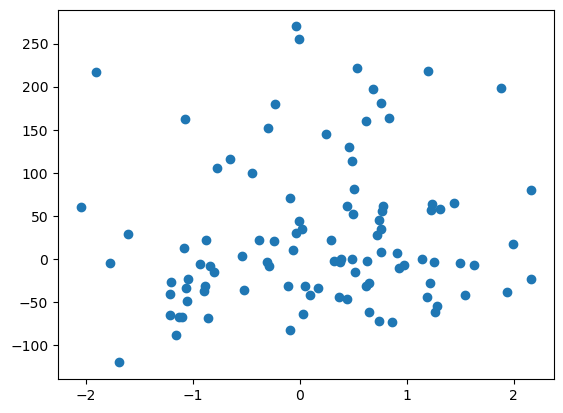

In [35]:
x, y = make_regression(n_samples = 100, n_features = 2, noise = 10)
y = y + abs(y / 2)
plt.scatter(x[:, 0], y)

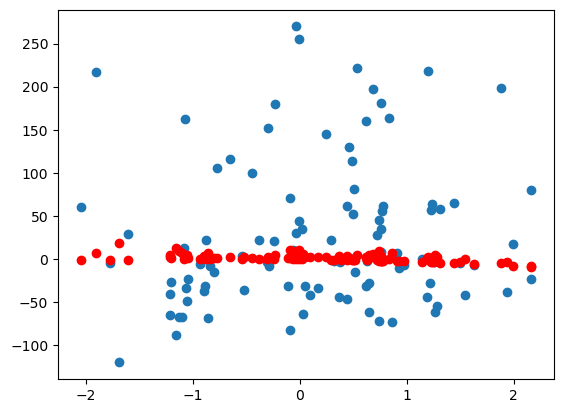

In [36]:
y = y.reshape(y.shape[0], 1)
X = np.hstack((x, np.ones((x.shape[0], 1))))
X = np.hstack((x ** 2, X))
theta = np.random.randn(X.shape[1], 1)
def model(X, theta):
    return X.dot(theta)

plt.scatter(x[:, 0], y)
plt.scatter(x[:, 0], model(X, theta), c = 'r')

In [37]:
def cost_function(X, y, theta):
    m = len(y)
    return  1 / (2 * m) * np.sum((model(X, theta) - y) ** 2)

def grad(X, y, theta):
    m = len(y)
    return  1 / m * X.T.dot(model(X, theta) - y)

def gradien_descent(X, y, theta, learning_rate, n_iterations):
    for i in range(0, n_iterations):
        theta = theta - learning_rate * grad(X, y, theta)
    return theta

In [38]:
theta_final = gradien_descent(X, y, theta, learning_rate = 0.01, n_iterations = 1000)
theta_final

array([[-0.34939331],
       [14.29930829],
       [ 7.59108008],
       [72.74292994],
       [14.0472726 ]])

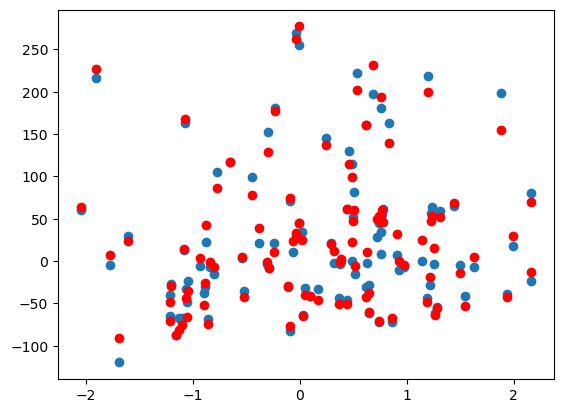

In [39]:
prediction = model(X, theta_final)
plt.scatter(x[:, 0], y)
plt.scatter(x[:, 0], prediction, c = 'r')

[[-0.34939331]
 [14.29930829]
 [ 7.59108008]
 [72.74292994]
 [14.0472726 ]]


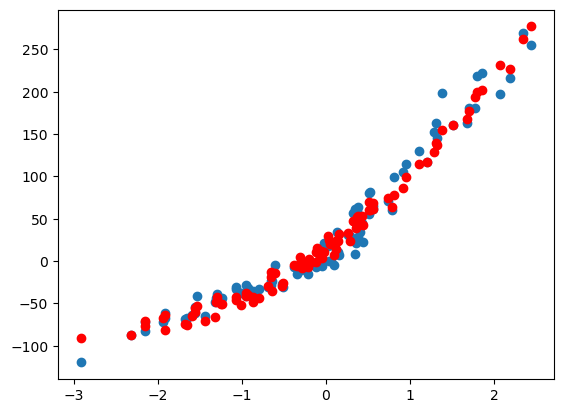

In [42]:
prediction = model(X, theta_final)
plt.scatter(x[:, 1], y)
plt.scatter(x[:, 1], prediction, c = 'r')

In [41]:
def coef_determination(y, pred):
    u = ((y - pred) ** 2).sum()
    v = ((y - y.mean()) ** 2).sum()
    return 1 - u / v

coef_determination(y, prediction)

0.9743267972879602